In [1]:
reset 

## Main Task: Regression Problem

The target variable is **ARR_DELAY**. We need to be careful which columns to use and which don't. For example, DEP_DELAY is going to be the perfect predictor, but we can't use it because in real-life scenario, we want to predict the delay before the flight takes of --> We can use average delay from earlier days but not the one from the actual flight we predict.  

For example, variables **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY** shouldn't be used directly as predictors as well. However, we can create various transformations from earlier values.

We will be evaluating your models by predicting the ARR_DELAY for all flights **1 week in advance**.

In [2]:
#Libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [3]:
model_df = pd.read_csv("flight_train_ready.csv")

flight_df = pd.read_csv("flight_test_ready.csv")


#### Random Forest Regressor 

In [4]:

model_df.drop(list(model_df.filter(regex = 'Unnamed')), axis = 1, inplace=True) 

In [5]:
# Extract target
y = model_df[['arr_delay']]
model_df = model_df.drop(columns=['arr_delay'])

# Turn categorical variables into dummies (one-hot encode)
x = pd.get_dummies(model_df)
X_columns = x.columns

In [6]:
#Try Sparse PCA, since this is sparse data...
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import MiniBatchSparsePCA

def pca_processing(X, n):
    '''Runs the MiniBatchSparsePCA on our data and returns the transformed features
    Params:
        - X: array of data features; assumed to be a sparse matrix (lots of 0s and 1s)
        - n: Number of PCA components to fit with
    Returns:
        - x: array of transformed data with n features  
        - x_columns: array of features names (just PCA number, in this case)
        ''' 
    pca_trans = MiniBatchSparsePCA(n_components=n, batch_size=30, random_state=0)
    pca_trans.fit(X)
    x = pca_trans.transform(X)
    x_columns = range(n)
    return x, x_columns

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=5)
rfr.fit(x, y)

/tmp/ipykernel_45649/1091169502.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x, y)


RandomForestRegressor(n_estimators=5)

In [8]:
y_train_pred = rfr.predict(x)

In [9]:
feature_val = rfr.feature_importances_
# print(type(feature_val))
# X_columns = range(5)  ### if using MiniBatchSparsePCA, use this
feature_name = x.columns
# print(feature_name)

features = pd.DataFrame({"Feature names": pd.Series(dtype='str'),
                         "Importance": pd.Series(dtype='int')})
features['Feature names'] = feature_name
features['Importance'] = feature_val
features.sort_values(by=['Importance'], ascending=False).head(20)

,Feature names,Importance
0,dep_hr,0.100978
1,arr_hr,0.100877
2,norm_dist,0.056953
768,month_Mar,0.026206
778,season_sum,0.024674
765,month_Aug,0.024553
777,season_spr,0.023976
11,mkt_unique_carrier_UA,0.017993
771,weekday_Mon,0.016645
767,month_Jun,0.015592


In [10]:
from sklearn.metrics import r2_score, mean_squared_error

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, y_train_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.3f" % r2_score(y, y_train_pred))

Mean squared error: 537.05
Coefficient of determination: 0.714


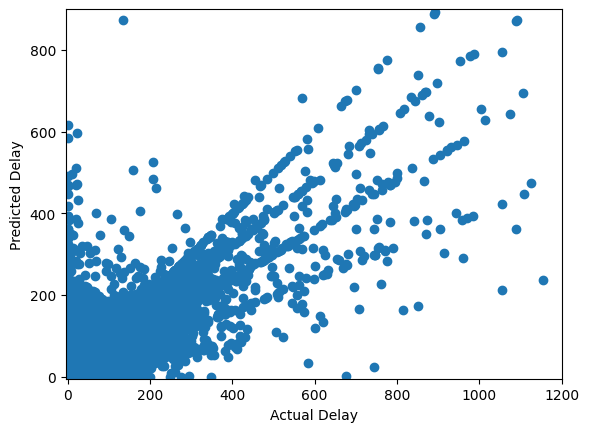

In [11]:
plt.scatter(y, y_train_pred)
plt.xlabel("Actual Delay")
plt.ylabel("Predicted Delay")
plt.xlim(-5, 1200 )
plt.ylim(-5, 900 )
plt.show()

In [12]:
# Commented out features are included in the model (although there must be a better way?)
model_df.drop(list(model_df.filter(regex = 'origin')), axis = 1, inplace=True) 
# model_df.drop(list(model_df.filter(regex = 'mkt_unique_carrier')), axis = 1, inplace=True) 
model_df.drop(list(model_df.filter(regex = 'carrier_size')), axis = 1, inplace=True) 
model_df.drop(list(model_df.filter(regex = 'dest')), axis = 1, inplace=True) 
# model_df.drop(list(model_df.filter(regex = 'dep_hr')), axis = 1, inplace=True) 
model_df.drop(list(model_df.filter(regex = 'dep_time_of_day')), axis = 1, inplace=True) 
# model_df.drop(list(model_df.filter(regex = 'arr_hr')), axis = 1, inplace=True) 
model_df.drop(list(model_df.filter(regex = 'arr_time_of_day')), axis = 1, inplace=True) 
model_df.drop(list(model_df.filter(regex = 'month')), axis = 1, inplace=True) 
# model_df.drop(list(model_df.filter(regex = 'season')), axis = 1, inplace=True) 
# model_df.drop(list(model_df.filter(regex = 'weekday')), axis = 1, inplace=True) 
# model_df.drop(list(model_df.filter(regex = 'norm_dist')), axis = 1, inplace=True) 
model_df.drop(list(model_df.filter(regex = 'distance')), axis = 1, inplace=True) 

Reduce and transform features using PCA

In [13]:
x, x_columns = pca_processing(x, 5)

In [14]:

rfr = RandomForestRegressor(n_estimators=5)
rfr.fit(x, y)
y_train_pred = rfr.predict(x)

/tmp/ipykernel_45649/2063399946.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x, y)


In [15]:

feature_val = rfr.feature_importances_
# print(type(feature_val))
# X_columns = range(5)  ### if using MiniBatchSparsePCA, use this
feature_name = x_columns
# print(feature_name)

features = pd.DataFrame({"Feature names": pd.Series(dtype='str'),
                         "Importance": pd.Series(dtype='int')})
features['Feature names'] = feature_name
features['Importance'] = feature_val
features.sort_values(by=['Importance'], ascending=False).head(20)

,Feature names,Importance
0,0,0.242685
1,1,0.233110
3,3,0.194692
4,4,0.176531
2,2,0.152982


In [16]:
from sklearn.metrics import r2_score, mean_squared_error

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, y_train_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.3f" % r2_score(y, y_train_pred))

Mean squared error: 625.53
Coefficient of determination: 0.667


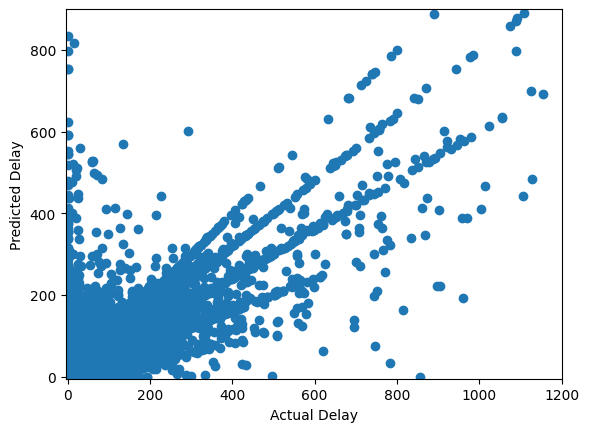

In [17]:
plt.scatter(y, y_train_pred)
plt.xlabel("Actual Delay")
plt.ylabel("Predicted Delay")
plt.xlim(-5, 1200 )
plt.ylim(-5, 900 )
plt.show()

#### Part 2: Creating the predicted flight delays from the model

In [18]:

# Commented out features are included in the model (although there must be a better way?)
flight_df.drop(list(flight_df.filter(regex = 'origin')), axis = 1, inplace=True) 
# flight_df.drop(list(flight_df.filter(regex = 'mkt_unique_carrier')), axis = 1, inplace=True) 
flight_df.drop(list(flight_df.filter(regex = 'carrier_size')), axis = 1, inplace=True) 
flight_df.drop(list(flight_df.filter(regex = 'dest')), axis = 1, inplace=True) 
# flight_df.drop(list(flight_df.filter(regex = 'dep_hr')), axis = 1, inplace=True) 
flight_df.drop(list(flight_df.filter(regex = 'dep_time_of_day')), axis = 1, inplace=True) 
# flight_df.drop(list(flight_df.filter(regex = 'arr_hr')), axis = 1, inplace=True) 
flight_df.drop(list(flight_df.filter(regex = 'arr_time_of_day')), axis = 1, inplace=True) 
flight_df.drop(list(flight_df.filter(regex = 'month')), axis = 1, inplace=True) 
# flight_df.drop(list(flight_df.filter(regex = 'season')), axis = 1, inplace=True) 
# flight_df.drop(list(flight_df.filter(regex = 'weekday')), axis = 1, inplace=True) 
# flight_df.drop(list(flight_df.filter(regex = 'norm_dist')), axis = 1, inplace=True) 
flight_df.drop(list(flight_df.filter(regex = 'distance')), axis = 1, inplace=True) 

In [19]:

# Turn categorical variables into dummies (one-hot encode)
x = pd.get_dummies(flight_df)
X_columns = x.columns

x_test, x_columns = pca_processing(x, 5)

# Make our prediction
y_pred = rfr.predict(x_test)

In [20]:
# Extract original file for submission (this one's been cleaned...yes, seems redundanit)
final_df = pd.read_csv("flight_test.csv")

In [21]:
final_df['predicted_delays'] = y_pred

<AxesSubplot:ylabel='Count'>

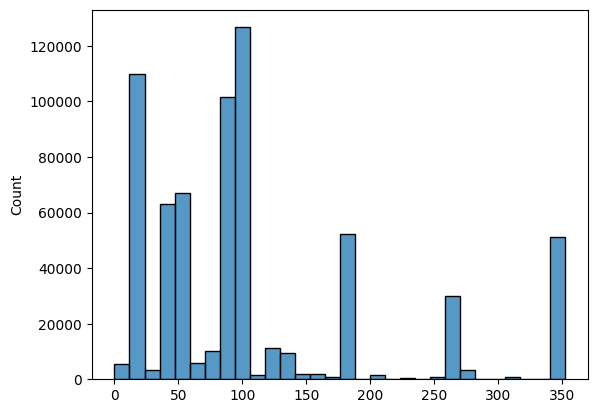

In [25]:
import seaborn as sns
sns.histplot(y_pred, bins=30)

In [23]:
final_df

,Unnamed: 0,fl_date,mkt_unique_carrier,origin,dest,crs_dep_time,crs_arr_time,crs_elapsed_time,flights,distance,predicted_delays
0,0,2020-01-01,WN,ONT,SFO,1810,1945,95,1,363,86.400000
1,1,2020-01-01,WN,ONT,SFO,1150,1320,90,1,363,99.400000
2,2,2020-01-01,WN,ONT,SJC,2020,2130,70,1,333,86.400000
3,3,2020-01-01,WN,ONT,SJC,1340,1455,75,1,333,101.400000
4,4,2020-01-01,WN,ONT,SJC,915,1035,80,1,333,182.200000
...,...,...,...,...,...,...,...,...,...,...,...
660551,660551,2020-01-31,DL,DCA,CVG,1859,2041,102,1,411,102.200000
660552,660552,2020-01-31,DL,DCA,CVG,1515,1702,107,1,411,102.200000
660553,660553,2020-01-31,DL,JFK,BTV,2205,2337,92,1,266,102.200000
660554,660554,2020-01-31,DL,ORD,JFK,1035,1356,141,1,740,45.266667


In [26]:
# Save results to submission file

final_df.to_csv("submission.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data/submission.csv'